# Smart Planning V4 : appreciation model 2 - appreciation
  
## Details 

- Problem : `Regression`

- dataSet : deleted `nombre de seances hors disponibilités d'intervenant` feature as it is handled by the planning generator software

- label & features values are integers ( 0...10) 


- Models :
    1. scikit Linear Regression Model 
    2. Decision tree
    3. SVM
    4. Random forest 
    5. Stochastic Gradient Descent
    6. KNeighbors_Regression 
    7. Bayesian_Ridge_Regression
    8. XGB Regressor
    9. ExtraTreesRegressor
    10. MLP Regressor (ANNs)



<br>

In [1]:
#!pip install sklearn==1.1.1

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, tree, svm, model_selection
import math
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
%matplotlib inline

<br> 

# Get the dataset

In [24]:
df = pd.read_excel("dataset4.xlsx")
df.head()

SC_simultanite_Perc  salles_utilisees_Perc  salles_surutiliseess_Perc  \
0                   97                     98                         95   
1                   98                    100                         93   
2                   92                     91                         99   
3                   92                     99                        100   
4                   98                     94                         92   

   places_videss_Perc  seances_samedis_Perc  Smidis_Perc  IntvDep8Hs_Perc  \
0                  94                    98           99               96   
1                  92                    94           97               99   
2                  91                    91           93               95   
3                  91                    99           95               95   
4                  92                    91           95               91   

   InterDepDisp6s_Perc  GrpDep8Hs_Perc  GrpDepDisp6s_Perc  SDepDIntvs_Perc  \
0                   95              94                 99               98   
1                   94              98                 94              100   
2                   95             100                 96               90   
3                   92              94                 97               91   
4                   91              99                 99              100   

   SHPDIntvs_Perc  Label  
0              99      0  
1              99      0  
2              94      1  
3              96      0  
4              91      1

<br>

# Quick look on the dataset

In [25]:
print("# DataSet shape : ", df.shape)
df.describe()

# DataSet shape :  (414, 13)


SC_simultanite_Perc  salles_utilisees_Perc  salles_surutiliseess_Perc  \
count           414.000000             414.000000                 414.000000   
mean             32.555556              34.908213                  34.048309   
std              31.391468              32.158826                  32.992003   
min               0.000000               0.000000                   0.000000   
25%               6.250000               9.000000                   7.000000   
50%              21.000000              23.000000                  21.000000   
75%              50.750000              55.000000                  59.750000   
max             100.000000             100.000000                 100.000000   

       places_videss_Perc  seances_samedis_Perc  Smidis_Perc  IntvDep8Hs_Perc  \
count          414.000000            414.000000   414.000000       414.000000   
mean            34.014493             32.949275    35.202899        34.495169   
std             31.955398             31.447713    32.426820        31.963186   
min              0.000000              0.000000     0.000000         0.000000   
25%              8.000000              8.000000     7.000000         9.000000   
50%             22.000000             20.000000    24.000000        23.000000   
75%             54.500000             48.000000    58.750000        54.750000   
max            100.000000            100.000000   100.000000       100.000000   

       InterDepDisp6s_Perc  GrpDep8Hs_Perc  GrpDepDisp6s_Perc  \
count           414.000000      414.000000         414.000000   
mean             33.625604       33.507246          33.879227   
std              30.999530       31.850342          31.760757   
min               0.000000        0.000000           0.000000   
25%               9.000000        7.000000           8.000000   
50%              22.000000       21.000000          22.000000   
75%              52.500000       56.000000          51.750000   
max             100.000000      100.000000         100.000000   

       SDepDIntvs_Perc  SHPDIntvs_Perc       Label  
count       414.000000      414.000000  414.000000  
mean         33.905797       34.270531    5.089372  
std          32.024556       32.480268    3.213807  
min           0.000000        0.000000    0.000000  
25%           8.000000        7.000000    2.000000  
50%          22.500000       22.000000    5.000000  
75%          55.000000       55.000000    8.000000  
max         100.000000      100.000000   10.000000

<br>

# Preprocessing data :


## missing values :

In [26]:
df.isna().count()

SC_simultanite_Perc          414
salles_utilisees_Perc        414
salles_surutiliseess_Perc    414
places_videss_Perc           414
seances_samedis_Perc         414
Smidis_Perc                  414
IntvDep8Hs_Perc              414
InterDepDisp6s_Perc          414
GrpDep8Hs_Perc               414
GrpDepDisp6s_Perc            414
SDepDIntvs_Perc              414
SHPDIntvs_Perc               414
Label                        414
dtype: int64

In [27]:
df.isnull().count()

SC_simultanite_Perc          414
salles_utilisees_Perc        414
salles_surutiliseess_Perc    414
places_videss_Perc           414
seances_samedis_Perc         414
Smidis_Perc                  414
IntvDep8Hs_Perc              414
InterDepDisp6s_Perc          414
GrpDep8Hs_Perc               414
GrpDepDisp6s_Perc            414
SDepDIntvs_Perc              414
SHPDIntvs_Perc               414
Label                        414
dtype: int64

## Eliminate duplicated rows

In [28]:
df.duplicated().sum()

7

In [29]:
df = df.drop_duplicates()

In [30]:
df.duplicated().sum()

0

In [31]:
df = df.reset_index()
df.head(2)

index  SC_simultanite_Perc  salles_utilisees_Perc  \
0      0                   97                     98   
1      1                   98                    100   

   salles_surutiliseess_Perc  places_videss_Perc  seances_samedis_Perc  \
0                         95                  94                    98   
1                         93                  92                    94   

   Smidis_Perc  IntvDep8Hs_Perc  InterDepDisp6s_Perc  GrpDep8Hs_Perc  \
0           99               96                   95              94   
1           97               99                   94              98   

   GrpDepDisp6s_Perc  SDepDIntvs_Perc  SHPDIntvs_Perc  Label  
0                 99               98              99      0  
1                 94              100              99      0

In [32]:
df = df.drop(columns=['index'])

In [33]:
df.head(2)

SC_simultanite_Perc  salles_utilisees_Perc  salles_surutiliseess_Perc  \
0                   97                     98                         95   
1                   98                    100                         93   

   places_videss_Perc  seances_samedis_Perc  Smidis_Perc  IntvDep8Hs_Perc  \
0                  94                    98           99               96   
1                  92                    94           97               99   

   InterDepDisp6s_Perc  GrpDep8Hs_Perc  GrpDepDisp6s_Perc  SDepDIntvs_Perc  \
0                   95              94                 99               98   
1                   94              98                 94              100   

   SHPDIntvs_Perc  Label  
0              99      0  
1              99      0

<br>

# Get insights from the dataset :


## count Label values

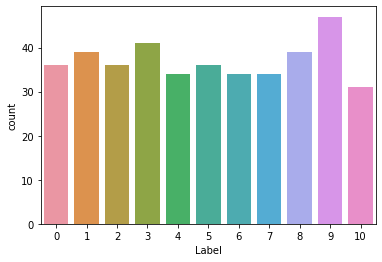

In [34]:
sn.countplot(x = 'Label',data = df)
plt.show()


<br> 

## features histogrames

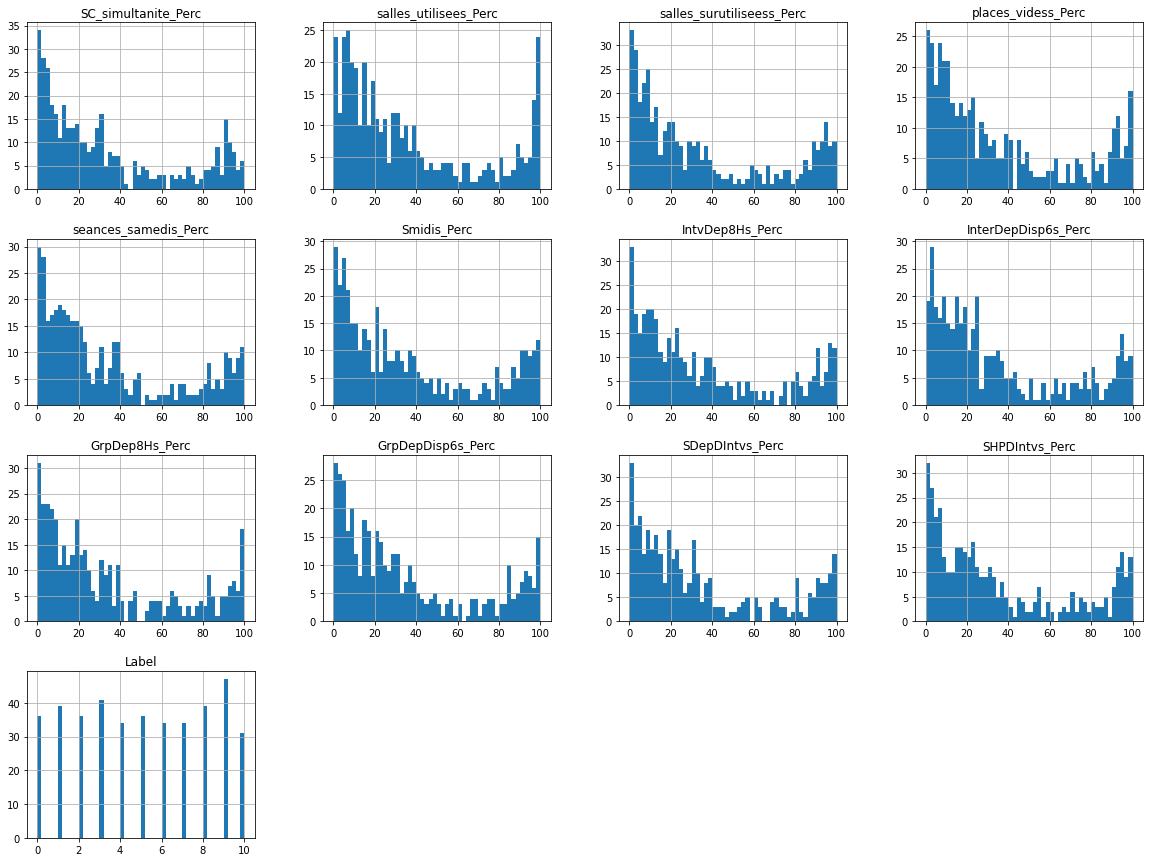

In [35]:
df.hist(bins=50, figsize=(20,15))
plt.show()

<br>

## scatter plot matrix : ploting each pair of features

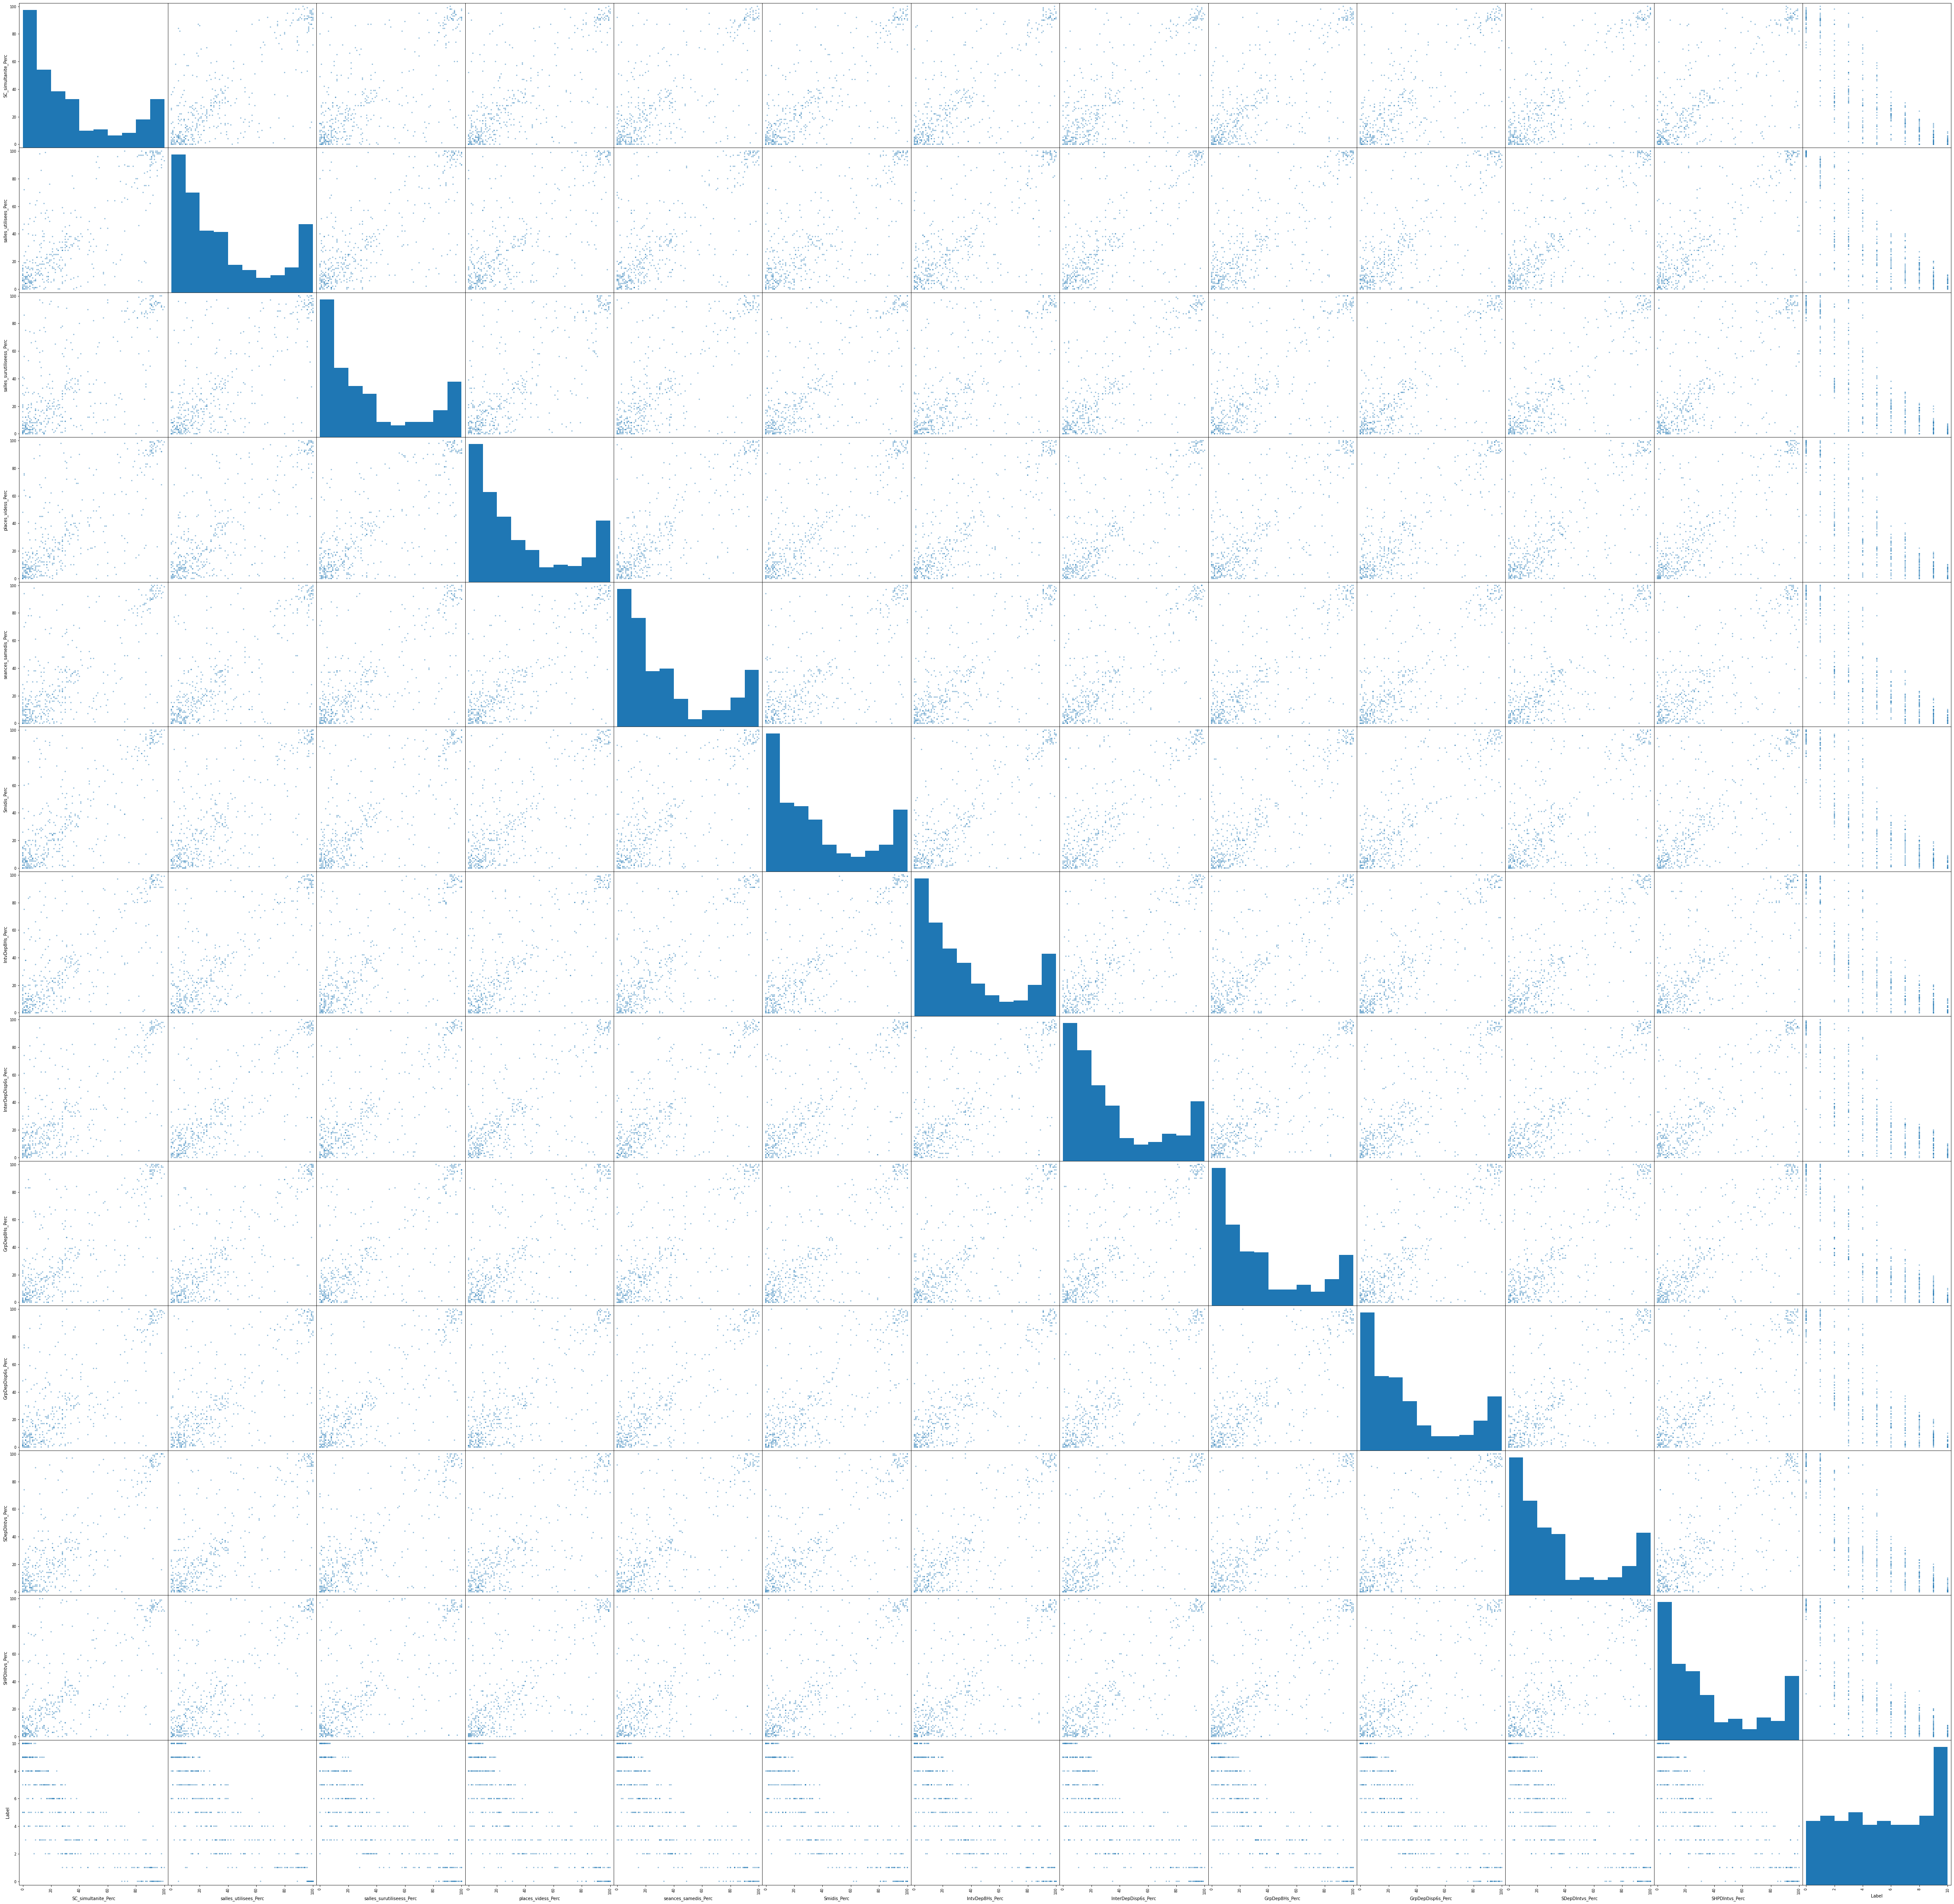

In [36]:
# Scatter plot matrix : better to open the image in a new tab
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (80, 80));

<br>

## SeaBorn pairplot : ploting each pair of features

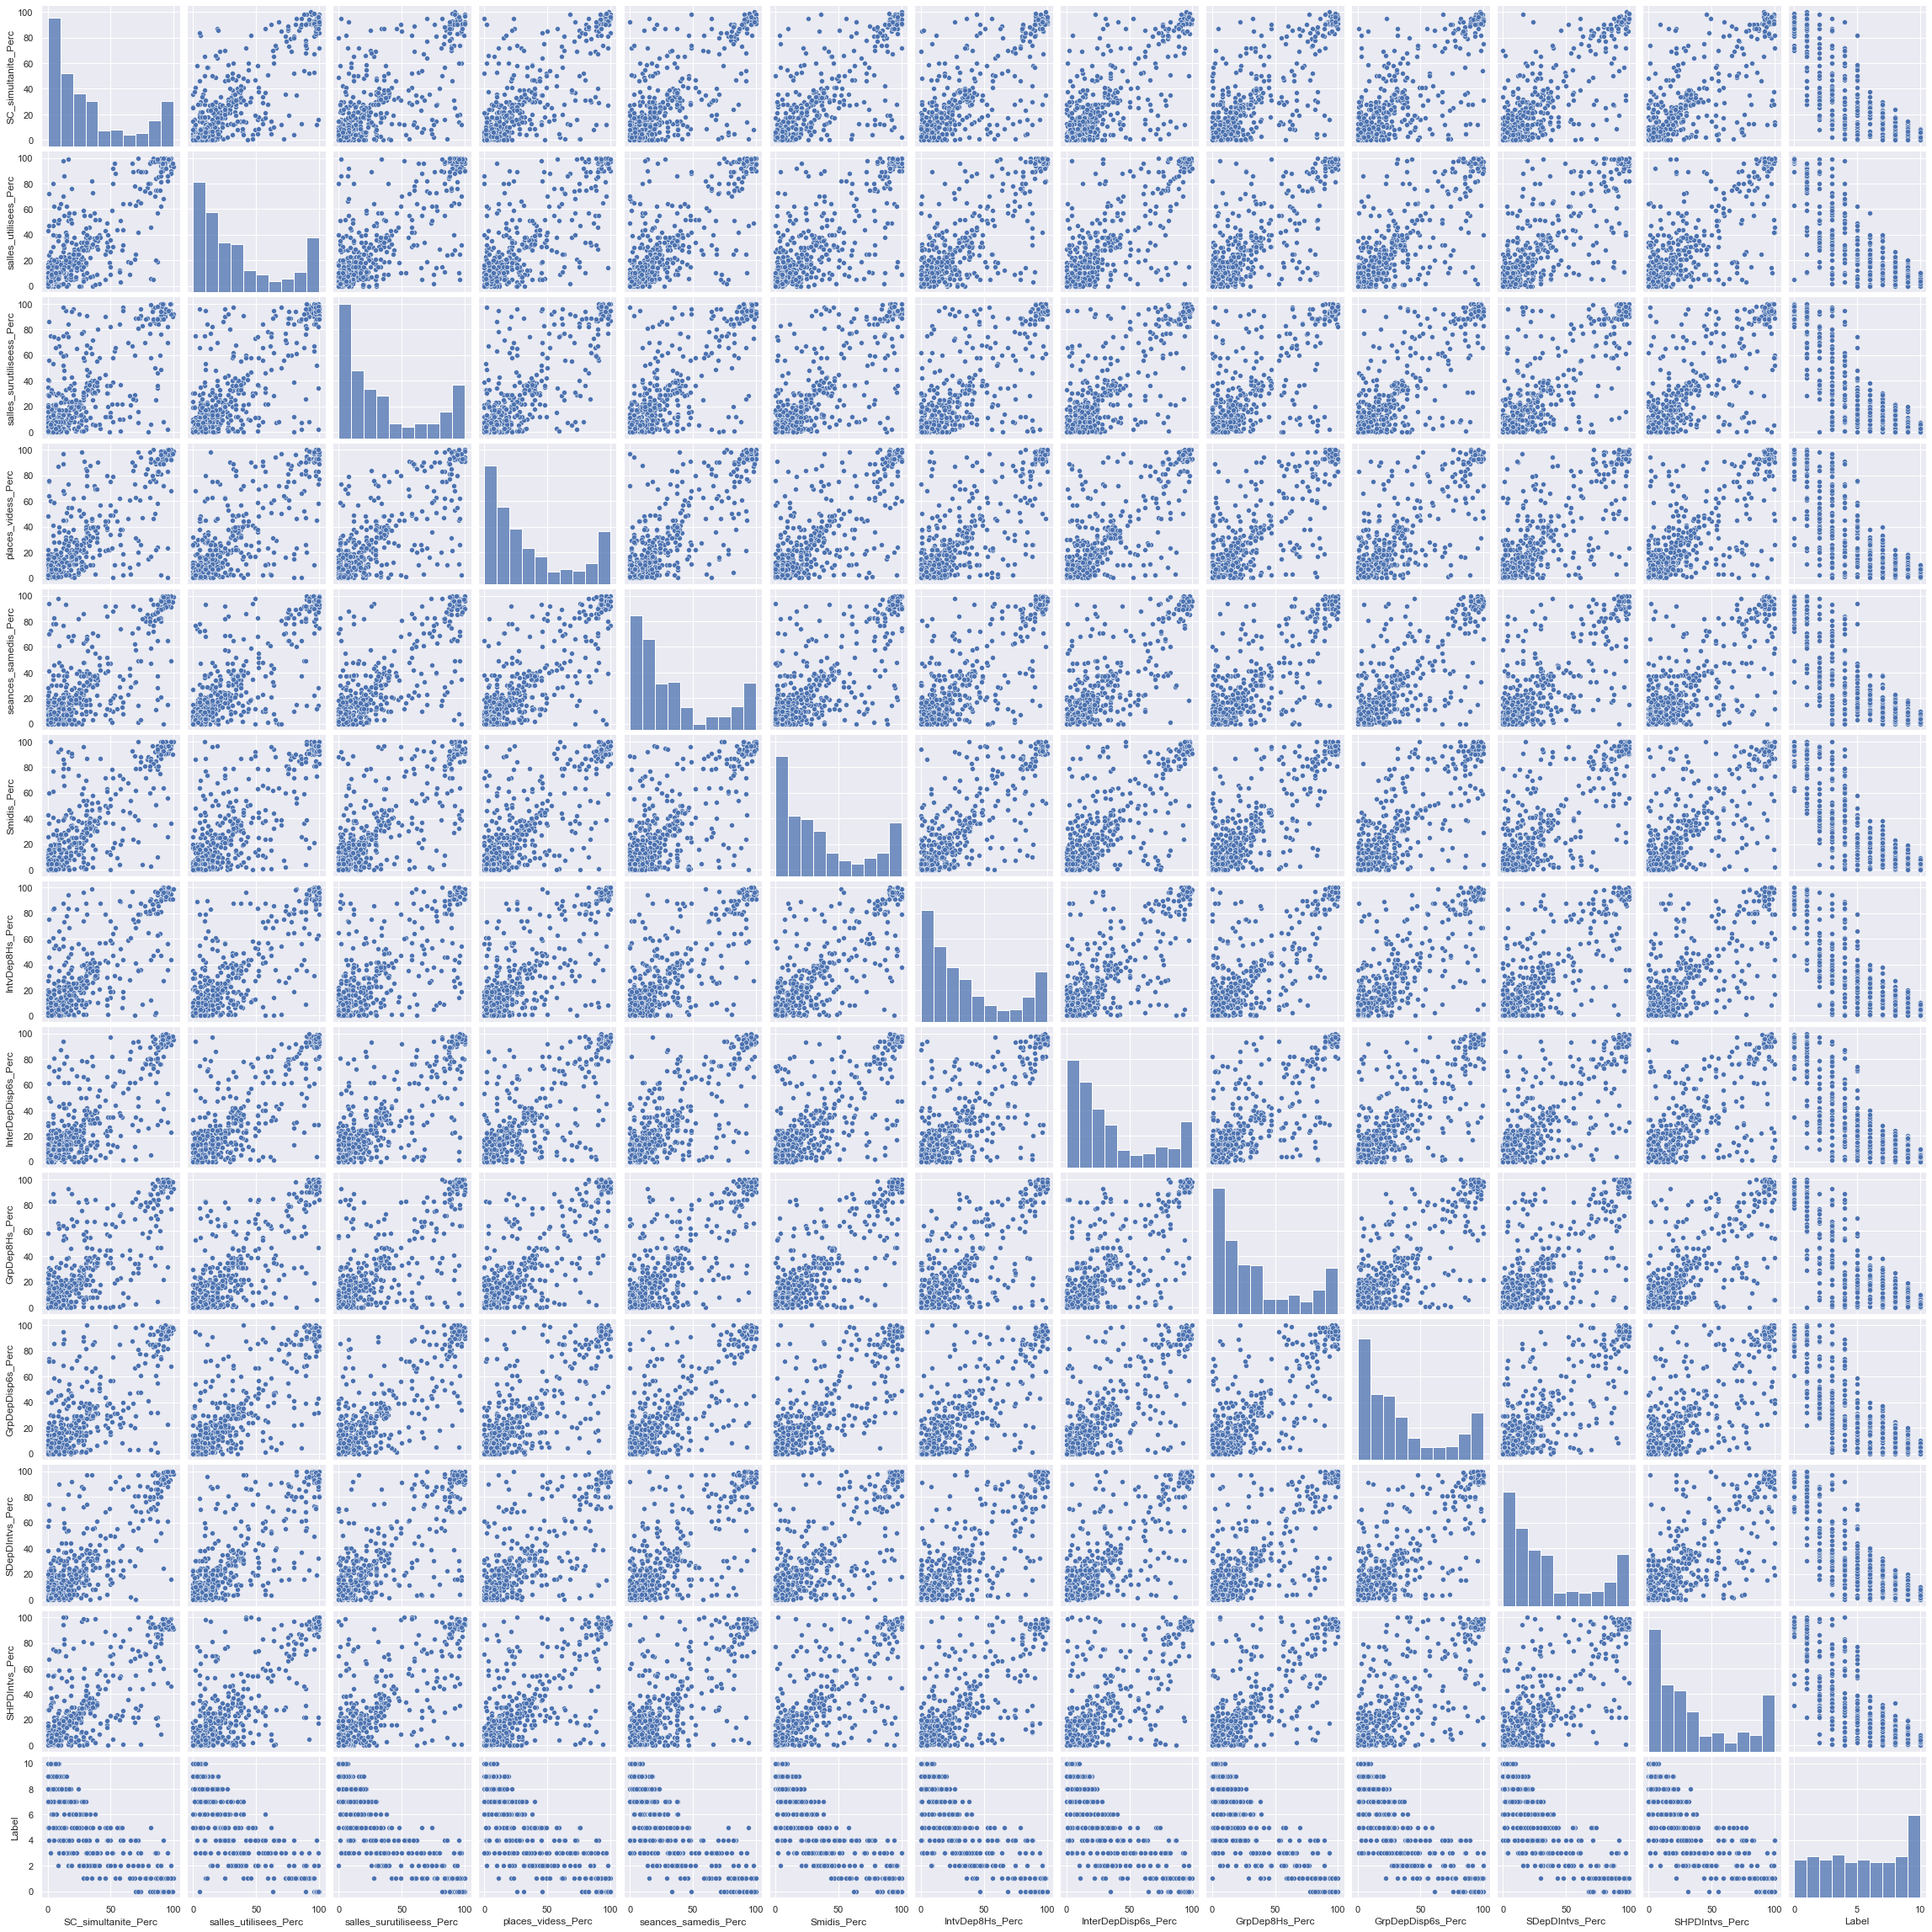

In [37]:
# Pairplot : better to open the image in a new tab
sn.set(rc = {'figure.figsize':(80,80)}) 
sn.pairplot(data = df) # same as the one before, here we can present 3 variables in the same graph, for example 'Label'
plt.show()            # Variable but using color (intensity?) hue; added the argument hue="Label" to pairplot()

<br>

## Correlation HeatMap (Matrix)

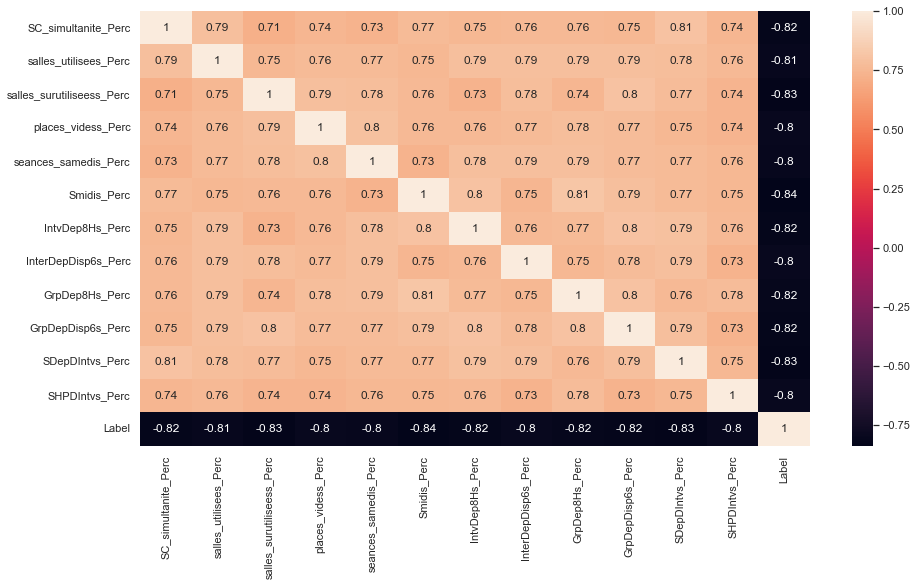

In [38]:
corr_mat = df.corr()
sn.set(rc = {'figure.figsize':(15,8)})
sn.heatmap(corr_mat, annot=True)
plt.show() 

### Strong correlation between : 
    
* all features and the `Label`


<br>

# Splitting the dataset : test & train sets > stratified splitting


In [41]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=77 )
for train_index, test_index in split.split(df, df["Label"]):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]


In [42]:
train_set.head()

SC_simultanite_Perc  salles_utilisees_Perc  salles_surutiliseess_Perc  \
264                    9                      1                          0   
273                    3                     12                         18   
342                   23                     14                         65   
144                   33                     46                         47   
373                   19                     49                         11   

     places_videss_Perc  seances_samedis_Perc  Smidis_Perc  IntvDep8Hs_Perc  \
264                  11                    12           17               20   
273                  17                    12            3                5   
342                  26                    39           31               83   
144                  25                    19           37               11   
373                  17                     0           89               53   

     InterDepDisp6s_Perc  GrpDep8Hs_Perc  GrpDepDisp6s_Perc  SDepDIntvs_Perc  \
264                   17              10                 14               17   
273                    0               0                 19               17   
342                   67              67                 73                4   
144                   57              18                 39               12   
373                   26              69                 67               92   

     SHPDIntvs_Perc  Label  
264              19      8  
273               6      9  
342              13      3  
144              37      4  
373              30      4

In [43]:
column_names = list(test_set.columns)
test_set.head()

SC_simultanite_Perc  salles_utilisees_Perc  salles_surutiliseess_Perc  \
41                    69                     78                         60   
369                   70                     63                         89   
26                    91                     95                         93   
390                   85                     97                         97   
128                   30                     28                          4   

     places_videss_Perc  seances_samedis_Perc  Smidis_Perc  IntvDep8Hs_Perc  \
41                   88                    62           89               73   
369                  31                    33           62               69   
26                   93                   100           94               97   
390                  91                    86           92               97   
128                  20                    19           43               31   

     InterDepDisp6s_Perc  GrpDep8Hs_Perc  GrpDepDisp6s_Perc  SDepDIntvs_Perc  \
41                    62              69                 67               81   
369                   35              85                 98               69   
26                    98             100                 90               95   
390                   96              95                 84               99   
128                   35              31                 22               13   

     SHPDIntvs_Perc  Label  
41               68      1  
369              55      0  
26               93      1  
390              92      0  
128              38      5

In [44]:
# Stratified splitting : 
feature = 10

print(" '"+str(feature)+"' label in test set  : ",len(test_set[test_set['Label']==feature])/len(test_set) )
print(" '"+str(feature)+"' label in train set  : ",len(train_set[train_set['Label']==feature])/len(train_set) )

print(" '"+str(feature)+"' label in the main set df:  ", len(df[df['Label']==feature])/len(df))

# the two values are slightly the same, the difference is due to the small dataset i used  (same for other labels)

 '10' label in test set  :  0.08064516129032258
 '10' label in train set  :  0.07536231884057971
 '10' label in the main set df:   0.07616707616707617


<br>

# Scal data


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_set_scaled = scaler.fit_transform(train_set)
test_set_scaled = scaler.transform(test_set) # scaling test set with the same properties as trainning set


In [46]:
train_set_scaled[:2] # 2 rows

array([[-0.76154569, -1.08032577, -1.06104129, -0.75009243, -0.68195383,
        -0.57713746, -0.46896132, -0.5576802 , -0.75006749, -0.64365393,
        -0.55235401, -0.46478305,  0.94424706],
       [-0.95117634, -0.73813094, -0.51859736, -0.56320132, -0.68195383,
        -1.00825004, -0.93719879, -1.10924754, -1.06172988, -0.4874712 ,
        -0.55235401, -0.86581267,  1.26052399]])

from sklearn.model_selection import GridSearchCV
<br> <br>

# Train Models




In [243]:
# set scoring method 
scoring =  ( "r2", 'neg_mean_squared_error' )
refit = 'r2' # refits an estimator on the whole dataset with the parameter setting that has the best cross-validated roc_auc_ovr_weighted score.


 <br>
 
##  1. scikit Linear Regression Model 

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


In [48]:


param_grid = [
     {
     },     
 ]
lm = linear_model.LinearRegression()
grid_search = GridSearchCV(lm, param_grid, cv=5, scoring=scoring, refit=refit, return_train_score=True)
grid_search.fit(train_set_scaled[:,:12], train_set_scaled[:,12])


GridSearchCV(cv=5, estimator=LinearRegression(), param_grid=[{}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [49]:
lm = grid_search.best_estimator_ # best estimator
lm

LinearRegression()

In [50]:
# best model has acheived following score
negative_mse = grid_search.best_score_
lm_train_rmse = np.sqrt(-negative_mse)
lm_train_rmse

0.39082614435285484

In [51]:
lm_train_refit_time = grid_search.refit_time_
lm_train_refit_time

0.00999760627746582

### Evaluation of the model using the test set :

In [52]:
final_model = grid_search.best_estimator_
X_test = test_set_scaled[:,:12]
y_test = test_set_scaled[:,12]
final_predictions = final_model.predict(X_test)
lm_test_mse = mean_squared_error(y_test, final_predictions)
lm_test_rmse = np.sqrt(lm_test_mse) # => evaluates to 47,730.2

print('best model: ', final_model)
print('final_mse :', lm_test_mse)
print('final_rmse :', lm_test_rmse)


best model:  LinearRegression()
final_mse : 0.17697408683860583
final_rmse : 0.4206828815611658



 <br>
 
##  2. Decision tree

In [53]:


param_grid = [
     {
         'criterion': ["squared_error", "friedman_mse", "absolute_error"],
         'splitter': ['best', 'random'],
         'random_state': [  0, 1, 3, 5, 7, 9, 11, 17, 21, 43, 33],
         'ccp_alpha':[ 0, 0.1, 0.001, 0.0001],
     },     
 ]
dt = tree.DecisionTreeRegressor()
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(train_set_scaled[:,:12], train_set_scaled[:,12])


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'ccp_alpha': [0, 0.1, 0.001, 0.0001],
                          'criterion': ['squared_error', 'friedman_mse',
                                        'absolute_error'],
                          'random_state': [0, 1, 3, 5, 7, 9, 11, 17, 21, 43,
                                           33],
                          'splitter': ['best', 'random']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [54]:
dt = grid_search.best_estimator_ # best estimator
dt

DecisionTreeRegressor(ccp_alpha=0.001, criterion='absolute_error',
                      random_state=33)

In [55]:
# best model has acheived following score
negative_mse = grid_search.best_score_
dt_train_rmse = np.sqrt(-negative_mse)
dt_train_rmse

0.2909707884497434

In [56]:
dt_train_refit_time = grid_search.refit_time_
dt_train_refit_time

0.011005878448486328

### Evaluation of the model using the test set :

In [57]:
final_model = grid_search.best_estimator_
X_test = test_set_scaled[:,:12]
y_test = test_set_scaled[:,12]
final_predictions = final_model.predict(X_test)
dt_test_mse = mean_squared_error(y_test, final_predictions)
dt_test_rmse = np.sqrt(dt_test_mse) # => evaluates to 47,730.2

print('best model: ', final_model)
print('final_mse :', dt_test_mse)
print('final_rmse :', dt_test_rmse)


best model:  DecisionTreeRegressor(ccp_alpha=0.001, criterion='absolute_error',
                      random_state=33)
final_mse : 0.08067023836505063
final_rmse : 0.28402506643789494



 <br>
 
##  3. SVM

In [58]:


param_grid = [
     {
         'kernel': ["rbf", "linear", "poly", 'sigmoid'],
         'degree': [ 7,8,9,10,11,12],
         'gamma': ['scale','auto'],
         'tol': [ 0.1, 0.01, 0.001,  ],
         'C': [  1,2,3,4,5,6,7,],
         'epsilon': [ 0.1, 0.01, 0.001, 0.0001 ],
     }, 
 ]
svr = svm.SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(train_set_scaled[:,:12], train_set_scaled[:,12])


GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7],
                          'degree': [7, 8, 9, 10, 11, 12],
                          'epsilon': [0.1, 0.01, 0.001, 0.0001],
                          'gamma': ['scale', 'auto'],
                          'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
                          'tol': [0.1, 0.01, 0.001]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [59]:
svr = grid_search.best_estimator_ # best estimator
svr

SVR(C=2, degree=7, epsilon=0.001, gamma='auto', tol=0.1)

In [ ]:
# best model has acheived following score
negative_mse = grid_search.best_score_
svr_train_rmse = np.sqrt(-negative_mse)
svr_train_rmse

In [ ]:
svr_train_refit_time = grid_search.refit_time_
svr_train_refit_time

### Evaluation of the model using the test set :

In [62]:
final_model = grid_search.best_estimator_
X_test = test_set_scaled[:,:12]
y_test = test_set_scaled[:,12]
final_predictions = final_model.predict(X_test)
svr_test_mse = mean_squared_error(y_test, final_predictions)
svr_test_rmse = np.sqrt(svr_test_mse) # => evaluates to 47,730.2

print('best model: ', final_model)
print('final_mse :', svr_test_mse)
print('final_rmse :', svr_test_rmse)


best model:  SVR(C=2, degree=7, epsilon=0.001, gamma='auto', tol=0.1)
final_mse : 0.015266964853363992
final_rmse : 0.12355955994322734



 <br>
 
## 4. Random forest 

In [63]:


param_grid = [
     {
        'n_estimators': [  14, 15, 16, 17, 18 ], 
        'max_features': [  8, 9, 10, 12, 13],
        'random_state': [ 0, 1, 3, 5, 7, 9, 11, 17, 21, 43, 33],
    },
    {
        'bootstrap': [False], 
        'n_estimators': [  14, 15, 16, 17, 18 ], 
        'max_features': [  8, 9, 10, 12, 13],
        'random_state': [ 0, 1, 3, 5, 7, 9, 11, 17, 21, 43, 33],
    }, 
 ]
rf = RandomForestRegressor( )
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(train_set_scaled[:,:12], train_set_scaled[:,12])


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [8, 9, 10, 12, 13],
                          'n_estimators': [14, 15, 16, 17, 18],
                          'random_state': [0, 1, 3, 5, 7, 9, 11, 17, 21, 43,
                                           33]},
                         {'bootstrap': [False],
                          'max_features': [8, 9, 10, 12, 13],
                          'n_estimators': [14, 15, 16, 17, 18],
                          'random_state': [0, 1, 3, 5, 7, 9, 11, 17, 21, 43,
                                           33]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [64]:
rf = grid_search.best_estimator_ # best estimator
rf

RandomForestRegressor(max_features=8, n_estimators=18, random_state=33)

In [65]:
# best model has acheived following score
negative_mse = grid_search.best_score_
rf_train_rmse = np.sqrt(-negative_mse)
rf_train_rmse

0.15271768435522262

In [66]:
rf_train_refit_time = grid_search.refit_time_
rf_train_refit_time

0.06781888008117676

### Evaluation of the model using the test set :

In [67]:
final_model = grid_search.best_estimator_
X_test = test_set_scaled[:,:12]
y_test = test_set_scaled[:,12]
final_predictions = final_model.predict(X_test)
rf_test_mse = mean_squared_error(y_test, final_predictions)
rf_test_rmse = np.sqrt(rf_test_mse) # => evaluates to 47,730.2

print('best model: ', final_model)
print('final_mse :', rf_test_mse)
print('final_rmse :', rf_test_rmse)


best model:  RandomForestRegressor(max_features=8, n_estimators=18, random_state=33)
final_mse : 0.020426501097125772
final_rmse : 0.14292131085714885



 <br>
 
## 5. Stochastic Gradient Descent

In [68]:


param_grid = [
     {
         'random_state': [ 0, 1, 3, 5, 7, 9, 11, 17, 21, 43, 33],
         'alpha': [ 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001 ],
         'tol': [ 0.1, 0.01, 0.001, 0.0001, 0.00001 ],
         'epsilon': [ 0.1, 0.01, 0.001, 0.0001 ],
     }, 
 ]
sgd =  linear_model.SGDRegressor(  ) 
grid_search = GridSearchCV(sgd, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(train_set_scaled[:,:12], train_set_scaled[:,12])


GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid=[{'alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06],
                          'epsilon': [0.1, 0.01, 0.001, 0.0001],
                          'random_state': [0, 1, 3, 5, 7, 9, 11, 17, 21, 43,
                                           33],
                          'tol': [0.1, 0.01, 0.001, 0.0001, 1e-05]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [69]:
sgd = grid_search.best_estimator_ # best estimator
sgd

SGDRegressor(alpha=0.01, random_state=21, tol=0.0001)

In [70]:
# best model has acheived following score
negative_mse = grid_search.best_score_
sgd_train_rmse = np.sqrt(-negative_mse)
sgd_train_rmse

0.38675330050230394

In [71]:
sgd_train_refit_time = grid_search.refit_time_
sgd_train_refit_time

0.0029981136322021484

### Evaluation of the model using the test set :

In [72]:
final_model = grid_search.best_estimator_
X_test = test_set_scaled[:,:12]
y_test = test_set_scaled[:,12]
final_predictions = final_model.predict(X_test)
sgd_test_mse = mean_squared_error(y_test, final_predictions)
sgd_test_rmse = np.sqrt(sgd_test_mse) # => evaluates to 47,730.2

print('best model: ', final_model)
print('final_mse :', sgd_test_mse)
print('final_rmse :', sgd_test_rmse)


best model:  SGDRegressor(alpha=0.01, random_state=21, tol=0.0001)
final_mse : 0.1757483165741429
final_rmse : 0.41922346853932557



 <br>
 
## 6. KNeighbors_Regression 

In [73]:


param_grid = [
     {
         'n_neighbors': [ 10, 11, 12, 13, 14],
     }, 
 ]
knr = KNeighborsRegressor( )
grid_search = GridSearchCV(knr, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(train_set_scaled[:,:12], train_set_scaled[:,12])


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [10, 11, 12, 13, 14]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [74]:
knr = grid_search.best_estimator_ # best estimator
knr

KNeighborsRegressor(n_neighbors=10)

In [75]:
# best model has acheived following score
negative_mse = grid_search.best_score_
knr_train_rmse = np.sqrt(-negative_mse)
knr_train_rmse

0.18881647796870413

In [76]:
knr_train_refit_time = grid_search.refit_time_
knr_train_refit_time

0.0

### Evaluation of the model using the test set :

In [77]:
final_model = grid_search.best_estimator_
X_test = test_set_scaled[:,:12]
y_test = test_set_scaled[:,12]
final_predictions = final_model.predict(X_test)
knr_test_mse = mean_squared_error(y_test, final_predictions)
knr_test_rmse = np.sqrt(knr_test_mse) # => evaluates to 47,730.2

print('best model: ', final_model)
print('final_mse :', knr_test_mse)
print('final_rmse :', knr_test_rmse)


best model:  KNeighborsRegressor(n_neighbors=10)
final_mse : 0.045481880390215536
final_rmse : 0.213264812827188



 <br>
 
## 7. Bayesian_Ridge_Regression

In [78]:


param_grid = [
     {
         'n_iter': [ 5, 10, 20, 50, 100, 200, 300, 400],
         'tol': [ 0.1, 0.01, 0.001, 0.0001, 0.00001 ],
     }, 
 ]
brr = linear_model.BayesianRidge()
grid_search = GridSearchCV(brr, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(train_set_scaled[:,:12], train_set_scaled[:,12])


GridSearchCV(cv=5, estimator=BayesianRidge(),
             param_grid=[{'n_iter': [5, 10, 20, 50, 100, 200, 300, 400],
                          'tol': [0.1, 0.01, 0.001, 0.0001, 1e-05]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [79]:
brr = grid_search.best_estimator_ # best estimator
brr

BayesianRidge(n_iter=5, tol=0.01)

In [80]:
# best model has acheived following score
negative_mse = grid_search.best_score_
brr_train_rmse = np.sqrt(-negative_mse)
brr_train_rmse

0.38887723839094956

In [81]:
brr_train_refit_time = grid_search.refit_time_
brr_train_refit_time

0.003977775573730469

### Evaluation of the model using the test set :

In [82]:
final_model = grid_search.best_estimator_
X_test = test_set_scaled[:,:12]
y_test = test_set_scaled[:,12]
final_predictions = final_model.predict(X_test)
brr_test_mse = mean_squared_error(y_test, final_predictions)
brr_test_rmse = np.sqrt(brr_test_mse) # => evaluates to 47,730.2

print('best model: ', final_model)
print('final_mse :', brr_test_mse)
print('final_rmse :', brr_test_rmse)


best model:  BayesianRidge(n_iter=5, tol=0.01)
final_mse : 0.17559679089571617
final_rmse : 0.41904270772287183



 <br>
 
## 8. XGB regressor

In [83]:
from xgboost import XGBRegressor

param_grid = [
     {
        'n_estimators': [  50, 100, 200, 300 ], 
        'learning_rate': [ 0.001, 0.1, 0.3, 0.5, 0.7],
        'gamma': [0.1, 0.3, 0.5, 0.6, 0.7],
         'random_state': [ 0, 1, 3, 5, 7, 9, 11, 17, 21, 43, 33],
     },
 ]
xgb = XGBRegressor( verbosity = 0)
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(train_set_scaled[:,:12], train_set_scaled[:,12])

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=0),
             param_grid=[{'gamma': [0.1, 0.3, 0.5, 0.6, 0.7],
                          'learning_rate': [0.001, 0.1, 0.3, 0.5, 0.7],
                          'n_estimators': [50, 100, 200, 300],
                          'random_state': [0, 1, 3, 5, 7, 9, 11, 17, 21, 43,
                                           33]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [84]:
xgb = grid_search.best_estimator_ # best estimator
xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.3, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

In [85]:
# best model has acheived following score
negative_mse = grid_search.best_score_
xgb_train_rmse = np.sqrt(-negative_mse)
xgb_train_rmse

0.17495685111378811

In [86]:
xgb_train_refit_time = grid_search.refit_time_
xgb_train_refit_time

0.358043909072876

### Evaluation of the model using the test set :

In [87]:
final_model = grid_search.best_estimator_
X_test = test_set_scaled[:,:12]
y_test = test_set_scaled[:,12]
final_predictions = final_model.predict(X_test)
xgb_test_mse = mean_squared_error(y_test, final_predictions)
xgb_test_rmse = np.sqrt(xgb_test_mse) # => evaluates to 47,730.2

print('best model: ', final_model)
print('final_mse :', xgb_test_mse)
print('final_rmse :', xgb_test_rmse)


best model:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.3, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)
final_mse : 0.0264602417322282
final_rmse : 0.16266604357464468



 <br>
 
##  9. ExtraTreesRegressor

In [ ]:

param_grid = [
     {
         'n_estimators': [  50, 100, 200, 300], 
         'random_state': [ 0, 1, 3, 5, 7, 9, 11, 17, 21 ],
         'ccp_alpha':[ 0, 0.1, 0.001, 0.0001],
         'criterion': ["squared_error", "friedman_mse", "absolute_error"],
     },
 ]
etr = ExtraTreesRegressor(  )
grid_search = GridSearchCV(etr, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(train_set_scaled[:,:12], train_set_scaled[:,12])

In [ ]:
etr = grid_search.best_estimator_ # best estimator
etr

In [ ]:
# best model has acheived following score
negative_mse = grid_search.best_score_
etr_train_rmse = np.sqrt(-negative_mse)
etr_train_rmse

In [ ]:
etr_train_refit_time = grid_search.refit_time_
etr_train_refit_time

### Evaluation of the model using the test set :

In [ ]:
final_model = grid_search.best_estimator_
X_test = test_set_scaled[:,:12]
y_test = test_set_scaled[:,12]
final_predictions = final_model.predict(X_test)
etr_test_mse = mean_squared_error(y_test, final_predictions)
etr_test_rmse = np.sqrt(etr_test_mse) # => evaluates to 47,730.2

print('best model: ', final_model)
print('final_mse :', etr_test_mse)
print('final_rmse :', etr_test_rmse)



 <br>
 
##  10. MLP Regressor (ANNs)

In [ ]:
from sklearn.neural_network import MLPRegressor

In [110]:
param_grid = [
    {
        'hidden_layer_sizes': [  (12, 24, 12, 1), ],
        'activation': [ 'relu', 'logistic', 'identity', 'tanh' ], 
        'solver': [ 'sgd', 'lbfgs', 'adam'], # adam , sgd
        'alpha': [ 0.001, 0.01, 0.0001, 0.00001],
        'learning_rate':[ 'constant', 'adaptive'],
        'random_state': [ 0, 1, 2, 3, 5, 7, 9, 11, 17, 21, 43, 33],
        'max_iter':[ 50, 100 ],
    },
]
mlp = MLPRegressor(verbose=False)
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(train_set_scaled[:,:12], train_set_scaled[:,12])


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid=[{'activation': ['relu', 'logistic', 'identity',
                                         'tanh'],
                          'alpha': [0.001, 0.01, 0.0001, 1e-05],
                          'hidden_layer_sizes': [(12, 24, 12, 1)],
                          'learning_rate': ['constant', 'adaptive'],
                          'max_iter': [50, 100],
                          'random_state': [0, 1, 2, 3, 5, 7, 9, 11, 17, 21, 43,
                                           33],
                          'solver': ['sgd', 'lbfgs', 'adam']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [111]:
mlp = grid_search.best_estimator_ # best estimator
mlp

MLPRegressor(activation='tanh', alpha=1e-05, hidden_layer_sizes=(12, 24, 12, 1),
             max_iter=50, random_state=21, solver='lbfgs')

In [112]:
# best model has acheived following score
negative_mse = grid_search.best_score_
mlp_train_rmse = np.sqrt(-negative_mse)
mlp_train_rmse

0.13700801879033458

In [113]:
mlp_train_refit_time = grid_search.refit_time_
mlp_train_refit_time

0.06279253959655762

### Evaluation of the model using the test set :

In [114]:
final_model = grid_search.best_estimator_
X_test = test_set_scaled[:,:12]
y_test = test_set_scaled[:,12]
final_predictions = final_model.predict(X_test)
mlp_test_mse = mean_squared_error(y_test, final_predictions)
mlp_test_rmse = np.sqrt(mlp_test_mse) # => evaluates to 47,730.2

print('best model: ', final_model)
print('final_mse :', mlp_test_mse)
print('final_rmse :', mlp_test_rmse)


best model:  MLPRegressor(activation='tanh', alpha=1e-05, hidden_layer_sizes=(12, 24, 12, 1),
             max_iter=50, random_state=21, solver='lbfgs')
final_mse : 0.019694129902075523
final_rmse : 0.140335775560174


# Final results

## Models results & metrics 

In [265]:

pd.DataFrame({  
        'Model' : [ 
            "scikit Linear Regression Model ",
            "Decision tree ",
            "SVM-svr",
            "Random forest ",
            "Stochastic Gradient Descent",
            "KNeighbors_Regression",
            "Bayesian_Ridge_Regression",
            "XGB Regressor",
            "ExtraTreesRegressor",
            " MLP Regressor (ANNs)",           
        ],
        'train_rmse' : [ 
            lm_train_rmse,
            dt_train_rmse,
            svr_train_rmse,
            rf_train_rmse,
            sgd_train_rmse,
            knr_train_rmse,
            brr_train_rmse,
            xgb_train_rmse,
            etr_train_rmse,
            mlp_train_rmse,
        ],
        'train_refit_time' : [ 
            lm_train_refit_time,
            dt_train_refit_time,
            svr_train_refit_time,
            rf_train_refit_time,
            sgd_train_refit_time,
            knr_train_refit_time,
            brr_train_refit_time,
            xgb_train_refit_time,
            etr_train_refit_time,
            mlp_train_refit_time,
        ],
        'test_rmse' : [ 
            lm_test_rmse,
            dt_test_rmse,
            svr_test_rmse,
            rf_test_rmse,
            sgd_test_rmse,
            knr_test_rmse,
            brr_test_rmse,
            xgb_test_rmse,
            etr_test_rmse,
            mlp_test_rmse,
        ],
        'test_mse' : [ 
            lm_test_mse,
            dt_test_mse,
            svr_test_mse,
            rf_test_mse,
            sgd_test_mse,
            knr_test_mse,
            brr_test_mse,
            xgb_test_mse,
            etr_test_mse,
            mlp_test_mse,
        ]


Model  train_rmse  train_refit_time  test_rmse  \
0  scikit Linear Regression Model     0.395096          0.001995   0.419148   
1                   Decision tree     0.280952          0.001993   0.301000   
2                          SVM-svr    0.133379          0.011937   0.125058   
3                   Random forest     0.157681          0.025931   0.138586   
4      Stochastic Gradient Descent    0.387415          0.000000   0.421860   
5            KNeighbors_Regression    0.187304          0.001994   0.213556   
6        Bayesian_Ridge_Regression    0.391800          0.000998   0.417306   
7                    XGB Regressor    0.176327          0.319654   0.174056   
8              ExtraTreesRegressor    0.131538          0.364023   0.121968   
9             MLP Regressor (ANNs)    0.137008          0.062793   0.140336   

   test_mse  Predicted Value  
0  0.175685         8.132620  
1  0.090601        10.000000  
2  0.015639         8.252649  
3  0.019206         8.187500  
4  0.177966         7.934573  
5  0.045606         8.692308  
6  0.174145         8.104193  
7  0.030295         8.980402  
8  0.014876         8.943333  
9  0.019694         9.400556

<br>

## Manual testing

In [266]:
###
# Trying to scale input from range (0-10) to scaler's range
###

# set input creterions

seance_en_simultanite_perc = 10          #   séances avec contrainte de simultanéité
salles_utilisees_perc = 70               #   salles utilisées
salles_surutiliseess_Perc = 0           #   salles surutilisées (44Heures /Semaine)
places_videss_Perc = 0                  #    places vides
seances_samedis_Perc = 0                #   séances de samedi
Smidis_Perc = 0                         #  séances de midi 
IntvDep8Hs_Perc = 0                     #  'intervenants qui depassent 8Heures /Jour
InterDepDisp6s_Perc = 0                 #  d'intervenants qui depassent le dispatchement 6Heures/Jour
GrpDep8Hs_Perc = 0                      #  groupes qui depassent 8Heures /Jour
GrpDepDisp6s_Perc = 0                   #  groupes qui depassent le dispatchement 6Heures/Jour
SHPDIntvs_Perc = 0                      # séances qui dépassent la disponibilité des intrervenants
SDepDIntvs_Perc = 0                     # séances hors préférences de disponibilités des intervenants

manual_testing_var = pd.DataFrame([[ seance_en_simultanite_perc, salles_utilisees_perc, salles_surutiliseess_Perc, places_videss_Perc, seances_samedis_Perc, 
Smidis_Perc, IntvDep8Hs_Perc, InterDepDisp6s_Perc, GrpDep8Hs_Perc, GrpDepDisp6s_Perc, SHPDIntvs_Perc, SDepDIntvs_Perc, 0]], columns=column_names)

scaled_testing_var = scaler.transform(manual_testing_var)
scaled_testing_var # scaled input

array([[-0.71299038,  1.08332673, -1.04571035, -1.07777042, -1.04550679,
        -1.08786819, -1.07375194, -1.09226548, -1.04678175, -1.06767494,
        -1.06685518, -1.03430343, -1.59337949]])

In [262]:
predicted_y_scaled = [
            lm.predict( scaled_testing_var[:,:12] )[0]  ,
            dt.predict( scaled_testing_var[:,:12] )[0] ,
            svr.predict( scaled_testing_var[:,:12] )[0] ,
            rf.predict( scaled_testing_var[:,:12] )[0] ,
            sgd.predict( scaled_testing_var[:,:12] )[0] ,
            knr.predict( scaled_testing_var[:,:12] )[0] ,
            brr.predict( scaled_testing_var[:,:12] )[0] ,
            xgb.predict( scaled_testing_var[:,:12] )[0] ,
            etr.predict( scaled_testing_var[:,:12] )[0] ,
            mlp.predict( scaled_testing_var[:,:12] )[0]  
] # 

pridicted_x_scaled = [
    scaled_testing_var,
    scaled_testing_var,
    scaled_testing_var,
    scaled_testing_var,
    scaled_testing_var,
    scaled_testing_var,
    scaled_testing_var,
    scaled_testing_var,
    scaled_testing_var,
    scaled_testing_var,
]
pridicted_xy_scaled = np.copy(pridicted_x_scaled)
predicted_y_scaled # each model's output


[0.9476152493210501,
 1.531068565019268,
 0.9851178104851764,
 0.96476235414241,
 0.8857367026722757,
 1.122486895633312,
 0.9387334176464334,
 1.2125005,
 1.2009185533448508,
 1.3437754071893964]

In [ ]:

for i in range( len(pridicted_x_scaled) )  :
    copy = np.copy( pridicted_x_scaled[i] )
    value = predicted_y_scaled[i]
    copy[:,12]= value
    pridicted_xy_scaled[i] = copy
pridicted_xy_scaled[:2,:] # adding each scaled output to scaled input in order to unscale the whole row

In [264]:
pridicted_xy_unscaled = np.copy(pridicted_xy_scaled)
for i in range( len( pridicted_xy_unscaled ) ):
    copy = np.copy( pridicted_xy_unscaled[i] )
    copy_unscaled =  scaler.inverse_transform(copy) # unscaling the whole row to get label in range 0-10
    pridicted_xy_unscaled[i] = np.copy(copy_unscaled)
pridicted_xy_unscaled[:2]


array([[[10.        , 70.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          8.13261957]],

       [[10.        , 70.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
         10.        ]],

       [[10.        , 70.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          8.25264897]]])

In [265]:

pd.DataFrame({  
        'Model' : [ 
            "scikit Linear Regression Model ",
            "Decision tree ",
            "SVM-svr",
            "Random forest ",
            "Stochastic Gradient Descent",
            "KNeighbors_Regression",
            "Bayesian_Ridge_Regression",
            "XGB Regressor",
            "ExtraTreesRegressor",
            " MLP Regressor (ANNs)",           
        ],
        'Predicted Value' : [ 
            pridicted_xy_unscaled[i][0,12] for i in range(len(pridicted_xy_unscaled))
        ],
})


Model  train_rmse  train_refit_time  test_rmse  \
0  scikit Linear Regression Model     0.395096          0.001995   0.419148   
1                   Decision tree     0.280952          0.001993   0.301000   
2                          SVM-svr    0.133379          0.011937   0.125058   
3                   Random forest     0.157681          0.025931   0.138586   
4      Stochastic Gradient Descent    0.387415          0.000000   0.421860   
5            KNeighbors_Regression    0.187304          0.001994   0.213556   
6        Bayesian_Ridge_Regression    0.391800          0.000998   0.417306   
7                    XGB Regressor    0.176327          0.319654   0.174056   
8              ExtraTreesRegressor    0.131538          0.364023   0.121968   
9             MLP Regressor (ANNs)    0.137008          0.062793   0.140336   

   test_mse  Predicted Value  
0  0.175685         8.132620  
1  0.090601        10.000000  
2  0.015639         8.252649  
3  0.019206         8.187500  
4  0.177966         7.934573  
5  0.045606         8.692308  
6  0.174145         8.104193  
7  0.030295         8.980402  
8  0.014876         8.943333  
9  0.019694         9.400556

<br>

# Result

> Having tested many cases, i see that MLP model is better as it gives better & reasonable results and it has minimum rmse `having given the current dataSet` !!

In [ ]:
# scatter 'y' test values ; real & preditions

#mlp # selected model

X_test = test_set_scaled[:,:12]
y_test = test_set_scaled[:,12]
final_predictions = mlp.predict(X_test)
# this is a model's output with less epochs & layers
plt.scatter( final_predictions, y_test)
plt.plot( [i for i in range(2)], [i for i in range(2)], "r")
plt.xlabel( "Predictions")
plt.ylabel( "Real values")
plt.show()

In [255]:
selected_model = mlp

<br>

# Storing & exporting the model with scaler !



## using pickle

In [256]:
import pickle

In [257]:
pickle.dump( selected_model, open('model2.pkl', 'wb'))
pickle.dump( scaler, open('scaler2.pkl', 'wb'))

# use this Later to load the model :

pickled_model = pickle.load(open('model2.pkl', 'rb'))
scaler2 = pickle.load(open('scaler2.pkl', 'rb'))
#pickled_model.predict(X_test)



## using joblib

In [258]:
import joblib

In [259]:
#perist it
joblib.dump(selected_model, "model2.sav")
joblib.dump(scaler, "scaler2.sav")

# load it
loaded_model = joblib.load("model2.sav")
loaded_scaler = joblib.load("scaler2.sav")